<a href="https://colab.research.google.com/github/MeshalCS/Project-Analyze-digital-currency/blob/main/Predict_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import pandas as pd 
import math

import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import plotly.graph_objects as go
plt.style.use ('fivethirtyeight')
import plotly.express as px


In [4]:
import matplotlib.pyplot as plt

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:

df=pd.read_csv('gdrive/My Drive/Colab Notebooks/BTC_data.csv')

In [6]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df.set_index(df['Timestamp'], inplace=True)
df.drop('Timestamp', axis=1, inplace=True)

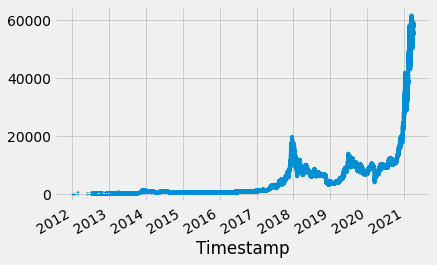

In [10]:
df['Low'].plot();

In [11]:
convertion={
    'Open':'first',
    'High':'max',
    'Low':'min',
    'Close':'mean',
    'Volume_(BTC)':'sum',
    'Volume_(Currency)':'sum'
}

ds_df = df.resample('W').apply(convertion)
ds_df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
Timestamp,,,,,,
2012-01-01,4.39,5.00,4.39,4.621429,116.919878,5.310995e+02
2012-01-08,5.00,7.00,4.93,6.017321,348.298975,1.975273e+03
2012-01-15,6.99,7.38,6.23,6.845145,399.325314,2.770146e+03
2012-01-22,6.20,7.10,5.52,6.332019,731.836776,4.604181e+03
2012-01-29,6.50,6.86,3.80,6.125431,393.194037,2.430909e+03
...,...,...,...,...,...,...
2021-03-07,45261.56,52652.82,45020.25,48915.008325,35430.404648,1.733903e+09
2021-03-14,50952.55,61781.83,49316.98,56071.977534,38099.486052,2.140668e+09
2021-03-21,58956.90,60595.13,53221.00,57410.340495,36350.207453,2.072504e+09


In [12]:
import plotly.graph_objects as go
from datetime import datetime
fig = go.Figure(go.Candlestick(
        x=ds_df.index,
        open=ds_df['Open'],
        high=ds_df['High'],
        low=ds_df['Low'],
        close=ds_df['Close']
    ))
fig.show()


In [13]:
col = list(df.columns)

null_val = []
for i in col:
    null_val.append(df[i].isna().value_counts())
pd.DataFrame(null_val)

,False,True
Open,3613769,1243608
High,3613769,1243608
Low,3613769,1243608
Close,3613769,1243608
Volume_(BTC),3613769,1243608
Volume_(Currency),3613769,1243608
Weighted_Price,3613769,1243608


In [14]:
df.dropna(inplace=True)

In [15]:
N=100

ds_df['rolling_mean' + str(N)] = ds_df.Close.rolling(window=5).mean()
ds_df['rolling_ema_'+ str(N)]  = ds_df.Close.ewm(min_periods=N, span=N).mean()

In [16]:
import plotly.graph_objects as go
fig = go.Figure()



fig.update_layout(
    title='Analyze Digital Currency',
    yaxis_title='Bitcoin Price'
)
fig.update_yaxes(type="log")

fig.add_trace(go.Scatter(x=ds_df.index, y=ds_df['Close'],
                        mode='lines',
                        name='Close'))

fig.add_trace(go.Scatter(x=ds_df.index, y=ds_df['rolling_mean' + str(N)],
                    mode='lines',
                    name='MEAN ' + str(N),
                    ))

fig.add_trace(go.Scatter(x=ds_df.index, y=ds_df['rolling_ema_' + str(N)],
                    mode='lines',
                    name='EMA ' + str(N),
                    ))



fig.show()

In [17]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .1)
training_data_len

361377

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[4.67786657e-05],
       [4.67786657e-05],
       [4.96922158e-05],
       ...,
       [9.50502668e-01],
       [9.51097518e-01],
       [9.51382237e-01]])

In [19]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([4.67786657e-05, 4.67786657e-05, 4.96922158e-05, 4.98540797e-05,
       4.98540797e-05, 5.40625410e-05, 5.66523633e-05, 5.66523633e-05,
       6.18320079e-05, 5.89184578e-05, 6.08608246e-05, 6.13464163e-05,
       6.13464163e-05, 5.89184578e-05, 6.13464163e-05, 6.13464163e-05,
       5.55193160e-05, 5.55193160e-05, 5.97277773e-05, 5.97277773e-05,
       5.97277773e-05, 6.18320079e-05, 6.18320079e-05, 6.26413274e-05,
       6.58786053e-05, 6.83065637e-05, 6.87921554e-05, 6.94396110e-05,
       7.28387528e-05, 7.28387528e-05, 7.52667112e-05, 7.59141668e-05,
       7.65616224e-05, 7.68853502e-05, 8.02844920e-05, 8.02844920e-05,
       7.97989003e-05, 7.99607642e-05, 7.97989003e-05, 7.96370364e-05,
       7.97989003e-05, 7.99607642e-05, 8.04463559e-05, 8.33599060e-05,
       8.33599060e-05, 8.33599060e-05, 8.33599060e-05, 8.46548172e-05,
       8.74065034e-05, 8.51404088e-05, 8.09319476e-05, 8.07700837e-05,
       7.93133086e-05, 7.93133086e-05, 7.93133086e-05, 7.93133086e-05,
     

In [20]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(361317, 60, 1)

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

361317/361317 [==============================] - 10345s 29ms/step - loss: 1.1983e-07


In [22]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range (60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rsme = np.sqrt(np.mean(predictions - y_test) ** 2)
rsme

2440.0567079939165

In [23]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:

fig = go.Figure()    
fig.update_layout(
    title='Analyze Digital Currency',
    yaxis_title='Bitcoin Price'
)

fig.add_trace(go.Scatter(x = train.index, y = train.Close,
                    mode='lines',
                    name='Close',))
fig.add_trace(go.Scatter(x = valid.index, y = valid.Close,
                    mode='lines',
                    name='Val',))
fig.add_trace(go.Scatter(x = valid.index, y = valid.Predictions,
                    mode='lines',
                    name='Predictions',))

fig.show()

In [26]:
valid.head()

,Close,Predictions
Timestamp,,
2014-01-12 09:05:00,878.01,861.589722
2014-01-12 09:06:00,878.01,861.502014
2014-01-12 09:07:00,878.01,861.436218
2014-01-12 09:09:00,878.01,861.392700
2014-01-12 09:10:00,878.01,861.367126
